# Loading and inspecting the dataset

In the first step we will:

- Load the CSV file from GitHub
- Check how many rows and columns we have
- Display the first few rows
- Review the data types and basic metadata for each column

This will help us understand better the data we work with.


<a href="https://colab.research.google.com/github/VladutFlorian28/Product-category-prediction-based-on-title/blob/main/Product_category_prediction_based_on_title.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
url = "https://raw.githubusercontent.com/VladutFlorian28/Product-category-prediction-based-on-title/main/data/products.csv"
df = pd.read_csv(url)

print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("Dataset info:")
print(df.info())

Dataset shape (rows, columns): (35311, 8)

First 5 rows of the dataset:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0     

# Checking the missing values
Missing data can cause problems during analysis or model training. Here we will do:

- Count the number of missing values(Nan) per column
- Visualize missing values using a heatmap

In [98]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())


Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


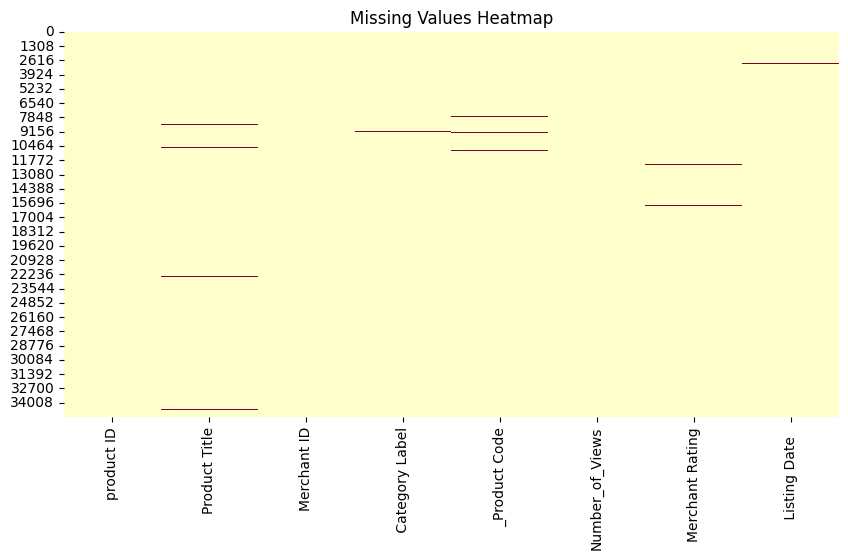

In [99]:
#Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

# Category analysis
Lets check how many categories are and how are those named. This will help us:

Understand the balance between classes
See if the dataset is skewed

In [100]:
category_counts = df[' Category Label'].str.lower().value_counts()
print("Category distribution (counts):")
print(category_counts)

Category distribution (counts):
 Category Label
fridge freezers     5495
washing machines    4036
mobile phones       4020
cpus                3771
tvs                 3564
fridges             3457
dishwashers         3418
digital cameras     2696
microwaves          2338
freezers            2210
fridge               123
cpu                   84
mobile phone          55
Name: count, dtype: int64


# This code visualizes the distribution of sentiments in our dataset using a bar chart. It helps us:

- Quickly see how many reviews are positive, negative, or neutral
- Understand the balance between sentiment classes
- Identify if the dataset is skewed toward a particular sentiment
- Gain a visual overview of the overall sentiment trends


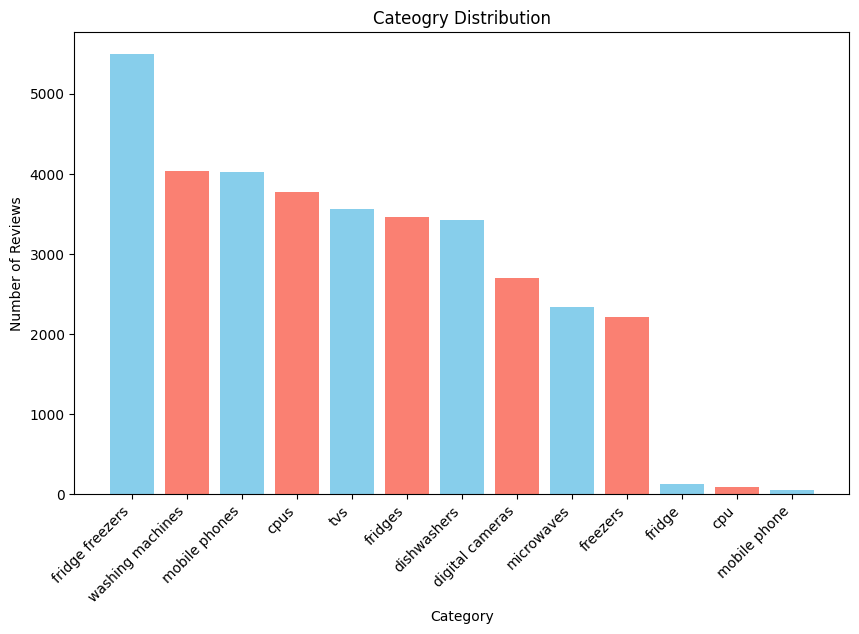

In [101]:
# Plot category distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color=['skyblue', 'salmon'])
plt.title("Cateogry Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45 , ha='right')
plt.show()

In [102]:
# 1. Check the data type of the 'Merchant Rating' column
print("Data type of product_price column:", df['Merchant Rating'].dtype)
# 2. Display the first 10 values from the column
print("\nFirst 10 values in product_price column:")
print(df['Merchant Rating'].head(10))
# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['Merchant Rating'].value_counts().head(20))
# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['Merchant Rating'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['Merchant Rating']].drop_duplicates())



Data type of product_price column: float64

First 10 values in product_price column:
0    2.5
1    4.8
2    3.9
3    3.4
4    1.6
5    1.6
6    1.2
7    4.5
8    3.4
9    3.8
Name: Merchant Rating, dtype: float64

Top 20 most frequent values in product_price column:
Merchant Rating
2.6    938
3.0    932
1.4    918
1.9    917
4.6    915
3.4    913
3.6    911
2.3    906
1.3    905
4.3    899
2.4    895
3.9    894
1.7    893
3.7    892
1.2    891
3.5    888
3.8    888
2.7    881
3.3    880
3.2    874
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,Merchant Rating


## Converting 'Listing Date' to Datetime

The code below converts the `'Listing Date'` column from an object (string) type to a datetime type. This allows us to:

- Perform date-based operations like sorting, filtering, or extracting year/month/day.
- Handle invalid or missing dates gracefully with `errors='coerce'` (these will become `NaT`).
- Ensure consistency in the dataset for analysis or visualization.

We also strip any extra spaces from column names to avoid errors when accessing them.



In [103]:

df.columns = df.columns.str.strip()


df['Listing Date'] = pd.to_datetime(df['Listing Date'], errors='coerce')
print("\nAfter conversion, data type of Listing Date column:", df['Listing Date'].dtype)




After conversion, data type of Listing Date column: datetime64[ns]


# Removing missing values
We already found the missing values in a previous step , now we will simply drop them and check the new shape for every column!

In [104]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (34760, 8)
Missing values per column:
product ID         0
Product Title      0
Merchant ID        0
Category Label     0
_Product Code      0
Number_of_Views    0
Merchant Rating    0
Listing Date       0
dtype: int64


Parsing the column Listing Date
To make this column usabel , we will:

Remove the "########" sign text and any extra characters,

Drop every invalid rows if conversion fails

In [105]:
# Step 1: Identify rows where 'Listing Date' contains '#'
mask_invalid = df['Listing Date'].astype(str).str.contains('#')

# Step 2: Drop those rows
df = df[~mask_invalid]

# Step 3: (Optional) Convert 'Listing Date' to datetime
df['Listing Date'] = pd.to_datetime(df['Listing Date'], errors='coerce')

# Step 4: Confirm result
print("Column type after cleaning:", df['Listing Date'].dtype)
print("\nNumber of remaining rows:", df.shape[0])


Column type after cleaning: datetime64[ns]

Number of remaining rows: 34760


✅ Standardizing the sentiment column

We will:

Convert all values to lowercase,
Convert column type to category,
Check results

In [106]:
# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['Category Label'] = df['Category Label'].astype(str).str.lower().str.strip()

# Step 2: Show all unique values in the sentiment column
print("Unique category values after cleaning:")
print(df['Category Label'].value_counts())

# Step 3: Convert column type to 'category'
df['Category Label'] = df['Category Label'].astype('category')
print("\nCategory  column converted to type:", df['Category Label'].dtype)

Unique category values after cleaning:
Category Label
fridge freezers     5424
washing machines    3971
mobile phones       3970
cpus                3711
tvs                 3502
fridges             3403
dishwashers         3374
digital cameras     2661
microwaves          2307
freezers            2182
fridge               121
cpu                   81
mobile phone          53
Name: count, dtype: int64

Category  column converted to type: category


✂️ Removing irrelevant columns
We will now remove columns that are not useful for model training:

- product id
- merchant id
- product code
- listing date
- cleaned listing date
The key features we want to keep are:

- product title
- category label 
- number of views
- merchant rating

In [107]:

print("Remaining columns:")
print(df.columns.tolist())



Remaining columns:
['product ID', 'Product Title', 'Merchant ID', 'Category Label', '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date']


Price summary by sentiment:
                   count         mean          std    min      25%     50%  \
Category Label                                                               
cpu                 81.0  2686.197531  1455.463701   71.0  1332.00  3046.0   
cpus              3711.0  2493.544058  1454.079210    2.0  1217.50  2489.0   
digital cameras   2661.0  2463.512965  1436.731024    4.0  1230.00  2429.0   
dishwashers       3374.0  2483.323059  1455.981897    0.0  1224.25  2460.5   
freezers          2182.0  2507.208983  1425.335177    0.0  1306.50  2491.0   
fridge             121.0  2425.685950  1415.763051   48.0  1193.00  2397.0   
fridge freezers   5424.0  2535.250369  1439.664365    0.0  1280.75  2577.0   
fridges           3403.0  2498.703791  1431.303605    0.0  1279.00  2481.0   
microwaves        2307.0  2476.523190  1428.709411    0.0  1247.50  2452.0   
mobile phone        53.0  2680.981132  1256.640553  127.0  1704.00  2854.0   
mobile phones     3970.0  2527.97380

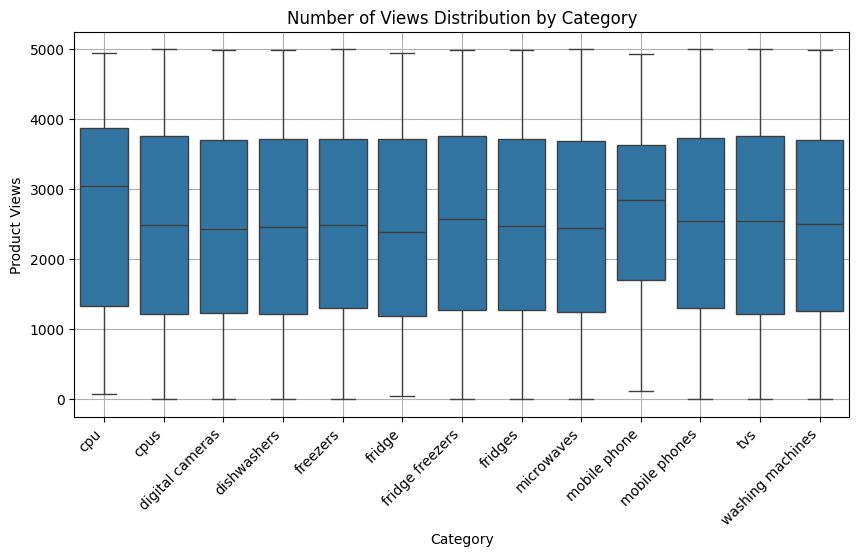

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show summary statistics grouped by sentiment
print("Price summary by sentiment:")
print(df.groupby('Category Label', observed=False)['Number_of_Views'].describe())

# Boxplot of prices by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category Label', y='Number_of_Views')
plt.title("Number of Views Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Product Views")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

Product title length summary:
count    34760.000000
mean        52.972066
std         22.417916
min          5.000000
25%         39.000000
50%         52.000000
75%         65.000000
max        200.000000
Name: product_title_length, dtype: float64
Product title length statistics by sentiment:
                   count       mean        std   min   25%   50%   75%    max
Category Label                                                               
cpu                 81.0  68.666667  27.307966  18.0  52.0  61.0  80.0  190.0
cpus              3711.0  66.980329  20.081086  11.0  55.0  65.0  76.0  159.0
digital cameras   2661.0  50.118001  24.512564   6.0  34.0  44.0  61.0  180.0
dishwashers       3374.0  50.184351  17.939197  10.0  39.0  51.0  61.0  192.0
freezers          2182.0  48.705775  18.132038  10.0  37.0  47.0  60.0  168.0
fridge             121.0  46.553719  17.015655  11.0  36.0  45.0  58.0   87.0
fridge freezers   5424.0  55.266777  20.467733   9.0  42.0  54.0  68.0  170.0
fri

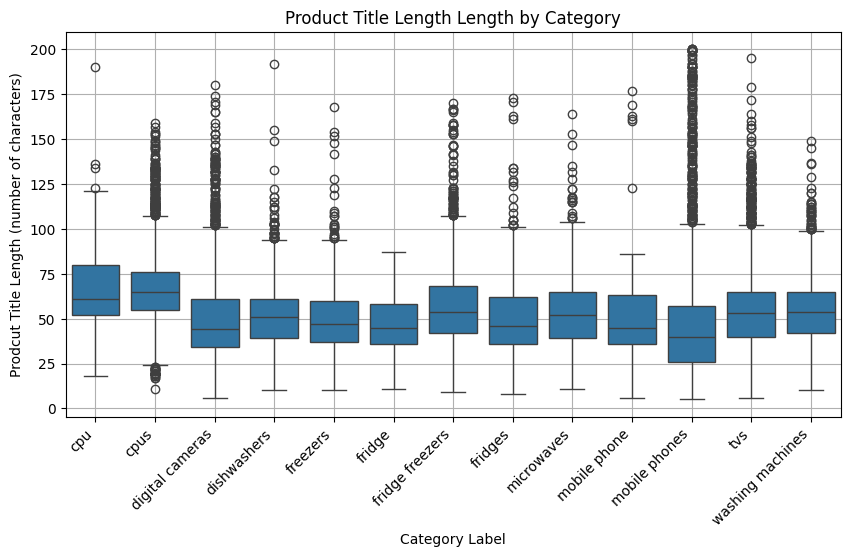

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new column with length of each review_text
df['product_title_length'] = df['Product Title'].astype(str).str.len()

# Show basic stats
print("Product title length summary:")
print(df['product_title_length'].describe())

# Group by sentiment and describe review length
print("Product title length statistics by sentiment:")
print(df.groupby('Category Label', observed=False)['product_title_length'].describe())

# Visualize distribution of review length by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category Label', y='product_title_length')
plt.title("Product Title Length Length by Category")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category Label")
plt.ylabel("Prodcut Title Length (number of characters)")
plt.grid(True)


plt.show()

In [ ]:
# Features and label
X = df[["Product Title", "Number_of_Views", "product_title_length" , "Merchant Rating"]]
y = df["Category Label"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessor: TF-IDF for text, MinMaxScaler for numeric feature
numeric_features = ["product_title_length", "Number_of_Views", "Merchant Rating"]
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(), "Product Title"),
        ("num", MinMaxScaler(), numeric_features)
    ]
)
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000 , class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Support Vector Machine": LinearSVC(class_weight='balanced' , max_iter=3000)
}
# Train and evaluate
for name, model in models.items():
    print(f"\n{name}")
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))



Logistic Regression
                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        16
            cpus       0.98      0.94      0.96       742
 digital cameras       1.00      0.99      0.99       532
     dishwashers       0.90      0.96      0.93       675
        freezers       0.89      0.95      0.92       436
          fridge       0.02      0.04      0.03        24
 fridge freezers       0.96      0.87      0.91      1085
         fridges       0.83      0.84      0.83       681
      microwaves       0.98      0.96      0.97       461
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.95      0.94      0.94       794
             tvs       0.96      0.98      0.97       701
washing machines       0.96      0.94      0.95       794

        accuracy                           0.92      6952
       macro avg       0.72      0.72      0.72      6952
    weighted avg       0.93      0.92      0.93  

c:\Users\vladu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vladu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vladu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        16
            cpus       0.98      1.00      0.99       742
 digital cameras       1.00      0.99      1.00       532
     dishwashers       0.98      0.96      0.97       675
        freezers       1.00      0.39      0.57       436
          fridge       0.00      0.00      0.00        24
 fridge freezers       0.69      0.99      0.81      1085
         fridges       0.88      0.73      0.80       681
      microwaves       1.00      0.95      0.97       461
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.98      0.98      0.98       794
             tvs       0.99      0.99      0.99       701
washing machines       0.98      0.97      0.97       794

        accuracy                           0.91      6952
       macro avg       0.73      0.69      0.70      6952
    weighted avg       0.92      0.91      0.90      6952


Decision T

c:\Users\vladu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vladu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vladu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        16
            cpus       0.97      1.00      0.98       742
 digital cameras       1.00      0.98      0.99       532
     dishwashers       0.94      0.96      0.95       675
        freezers       0.95      0.93      0.94       436
          fridge       0.00      0.00      0.00        24
 fridge freezers       0.91      0.94      0.92      1085
         fridges       0.88      0.88      0.88       681
      microwaves       0.98      0.96      0.97       461
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.96      0.98      0.97       794
             tvs       0.98      0.99      0.98       701
washing machines       0.95      0.94      0.94       794

        accuracy                           0.95      6952
       macro avg       0.73      0.73      0.73      6952
    weighted avg       0.94      0.95      0.94      6952


Support Ve

**Because for the categories 'cpu' and 'mobile phone' the examples are very few, i.e. under 100, the model cannot learn them even with class weight balanced**

*But from what we have managed it appears that the Support Vector Machine algorithm is the most accurate for our data set*